In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np

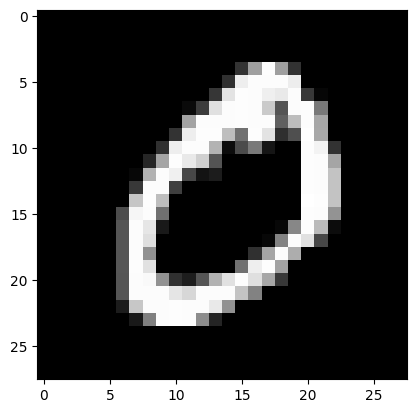

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

plt.imshow(x_train[1], cmap="gray")

In [5]:
x_train[0].shape

(28, 28)

In [ ]:
#Total features = 28*28
x_train[0]

In [8]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
x_train[0]

In [13]:
encoder_input = keras.Input(shape=(28,28,1), name="img")
x = keras.layers.Flatten()(encoder_input)
encoder_output  = keras.layers.Dense(64, activation="relu")(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")

decoder_input = keras.layers.Dense(784, activation="relu")(encoder_output)
decoder_output = keras.layers.Reshape((28,28,1))(decoder_input)

opt = keras.optimizers.legacy.Adam(learning_rate=0.001, decay = 1e-6)

autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                50240     
                                                                 
 dense_6 (Dense)             (None, 784)               50960     
                                                                 
 reshape_2 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
Total params: 101200 (395.31 KB)
Trainable params: 101200 (395.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
autoencoder.compile(opt, loss="mse")

In [16]:
autoencoder.fit(x_train, x_train, epochs=3, batch_size=32, validation_split=0.1)

Epoch 1/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0174 - val_loss: 0.0115
Epoch 2/3
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0110 - val_loss: 0.0105
Epoch 3/3
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0104 - val_loss: 0.0102


In [27]:
example = encoder.predict([x_test[1].reshape(-1, 28,28,1)])[0]

print(example)

1/1 [==============================] - 0s 36ms/step
[3.0465035  2.341844   0.61009115 2.2283828  0.         0.
 0.8656923  0.25617826 2.166429   0.09707391 0.65113145 1.0329567
 1.2986088  1.5177989  1.0493628  2.386607   0.6061861  0.
 1.110078   1.4743422  0.72773534 1.9886819  0.612586   2.22317
 0.81600547 1.316827   1.1136838  0.64814824 1.1608263  0.1685904
 1.1649673  0.10043492 0.8098451  0.7857603  2.0712595  1.3523396
 2.4413311  3.9159038  2.0909758  2.365583   2.2518013  1.4422781
 0.         1.6664441  1.2657065  3.4677181  0.5895066  0.7123333
 1.716467   1.2814547  0.46019953 1.2279375  0.8821348  2.7815802
 1.2693603  1.0368458  1.9863753  1.1460434  1.52476    0.9710106
 3.2714798  0.47229892 2.7417943  0.58691514]


In [28]:
example.shape

(64,)

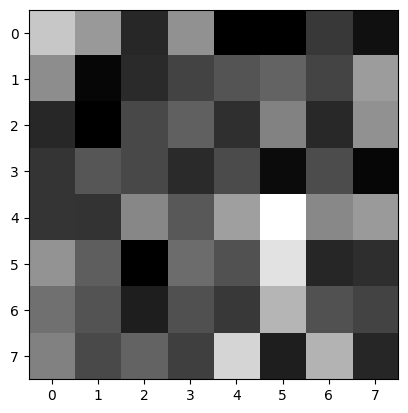

In [29]:
plt.imshow(example.reshape(8,8), cmap="gray")

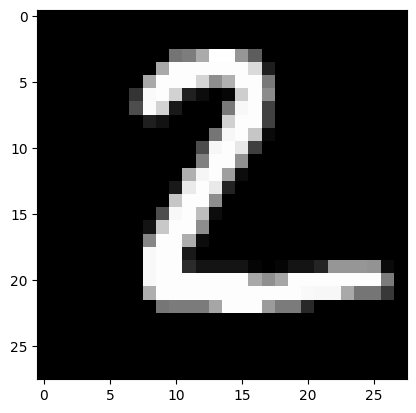

In [24]:
plt.imshow(x_test[1], cmap="gray")

In [25]:
ae_out = autoencoder.predict([x_test[1].reshape(-1, 28,28,1)])[0]

1/1 [==============================] - 0s 33ms/step


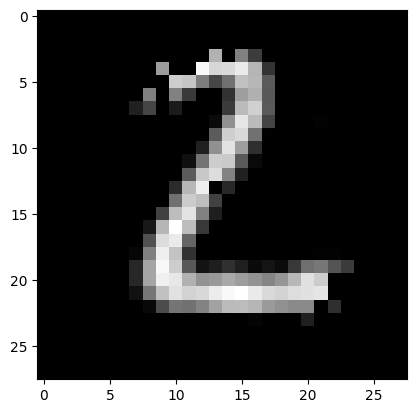

In [26]:
plt.imshow(ae_out, cmap="gray")

In [32]:
import random

def add_noise(img, random_choice=5):
    noisy = []
    for row in img:
        new_row = []
        for pix in row:
            if random.choice(range(100)) < random_choice:
                new_val = random.uniform(0, 1)
                new_row.append(new_val)
            else:
                new_row.append(pix)
        noisy.append(new_row)
    return np.array(noisy)

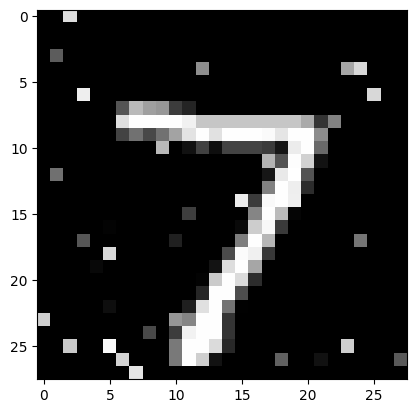

In [34]:
noisy = add_noise(x_test[0])
plt.imshow(noisy, cmap="gray")

1/1 [==============================] - 0s 40ms/step


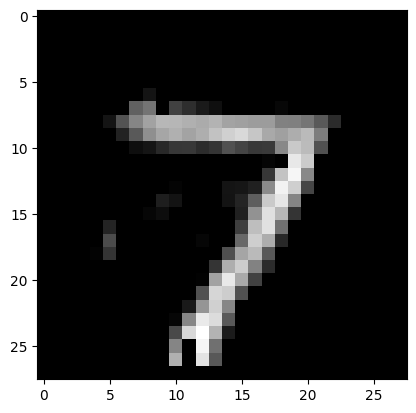

In [35]:
ae_out = autoencoder.predict([noisy.reshape(-1, 28,28,1)])[0]
plt.imshow(ae_out, cmap="gray")

In [1]:
import os
import numpy as np
from PIL import Image

# Path to the folder with the cat images
folder_path = './dataset/Cat/'

# Load the images
photos = []
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Check for image file types
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path)
        img = img.resize((64, 64))  # Resize the image to 64x64
        img_array = np.array(img)
        photos.append(img_array)

# # Convert to numpy array and normalize
# photos = np.array(photos) / 255.0

# # Split into training and testing
# train_input = np.array(photos[:250]).reshape(-1, 64, 64, 3)  # Change 1 to -1 for multiple images
# test_input = np.array(photos[250:]).reshape(-1, 64, 64, 3)

# print("Train input shape:", train_input.shape)
# print("Test input shape:", test_input.shape)


In [17]:
train_input = np.array(photos[:480]).reshape(-1, 64, 64, 3)/255.0
test_input = np.array(photos[480:]).reshape(-1, 64, 64, 3)/255.0

In [6]:
epochs = 15
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.001, decay=1e-6)

encoder_input = keras.Input(shape=(64,64,3), name="img_in")
x = keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same")(encoder_input)
x = keras.layers.MaxPooling2D((2, 2), padding="same")(x)
x = keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = keras.layers.MaxPooling2D((2, 2), padding="same")(x)
x = keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = keras.layers.MaxPooling2D((2, 2), padding="same")(x)
x = keras.layers.Flatten()(x)
encoder_output = keras.layers.Dense(512, activation="relu")(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

decoder_input = keras.layers.Dense(2048, activation="relu")(encoder_output)
x = keras.layers.Reshape((8, 8, 32))(decoder_input)
x = keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = keras.layers.UpSampling2D((2, 2))(x)
x = keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = keras.layers.UpSampling2D((2, 2))(x)
x = keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = keras.layers.UpSampling2D((2, 2))(x)
decoder_output = keras.layers.Conv2D(3, (3,3), activation="relu", padding="same")(x)

autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img_in (InputLayer)         [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        

In [7]:
autoencoder.compile(opt, loss="mse")

In [18]:
autoencoder.fit(train_input, train_input, epochs=30, batch_size=5, validation_split=0.1)

Epoch 1/30
87/87 [==============================] - 10s 112ms/step - loss: 0.0187 - val_loss: 0.0202
Epoch 2/30
87/87 [==============================] - 9s 108ms/step - loss: 0.0175 - val_loss: 0.0195
Epoch 3/30
87/87 [==============================] - 10s 109ms/step - loss: 0.0166 - val_loss: 0.0194
Epoch 4/30
87/87 [==============================] - 9s 107ms/step - loss: 0.0162 - val_loss: 0.0186
Epoch 5/30
87/87 [==============================] - 9s 108ms/step - loss: 0.0154 - val_loss: 0.0186
Epoch 6/30
87/87 [==============================] - 10s 110ms/step - loss: 0.0150 - val_loss: 0.0180
Epoch 7/30
87/87 [==============================] - 9s 109ms/step - loss: 0.0141 - val_loss: 0.0171
Epoch 8/30
87/87 [==============================] - 9s 107ms/step - loss: 0.0137 - val_loss: 0.0183
Epoch 9/30
87/87 [==============================] - 9s 107ms/step - loss: 0.0133 - val_loss: 0.0170
Epoch 10/30
87/87 [==============================] - 9s 106ms/step - loss: 0.0132 - val_loss: 0.0

In [21]:
ae_out = autoencoder.predict([test_input[1].reshape(-1, 64,64,3)])[0]

1/1 [==============================] - 0s 52ms/step


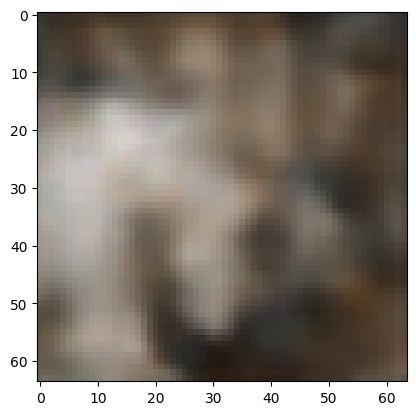

In [22]:
plt.imshow(ae_out)